 -- COVERAGE RESULTS -- 
 Date of execution: 25-08-2022 20:28:54
 Title: 
 Description: 
 Parsed 125949 lines from orbit file ../../Sample_Data/orbital_data\OrbitSample.csv
 Used Kp indices starting from year 2015
 Bin Misses: 12861     Bin Hits: 2388
 Duration of execution: 7 seconds  or  0.11 minutes
 
AEM_L1  : 22<MLT<=02 060<MagLat<=075 115<Alt<=120 0<Kp<=2 Coverage=    0.000/ 50.00min        0/ 3000sec
AEM_L2  : 22<MLT<=02 060<MagLat<=075 120<Alt<=125 0<Kp<=2 Coverage=   44.000/ 50.00min     2640/ 3000sec
AEM_L3  : 22<MLT<=02 060<MagLat<=075 125<Alt<=130 0<Kp<=2 Coverage=    0.000/ 50.00min        0/ 3000sec
AEM_L4  : 22<MLT<=02 060<MagLat<=075 130<Alt<=135 0<Kp<=2 Coverage=    0.000/ 50.00min        0/ 3000sec
AEM_L5  : 22<MLT<=02 060<MagLat<=075 135<Alt<=140 0<Kp<=2 Coverage=    0.000/ 50.00min        0/ 3000sec
AEM_L6  : 22<MLT<=02 060<MagLat<=075 140<Alt<=145 0<Kp<=2 Coverage=    0.000/ 50.00min        0/ 3000sec
AEM_L7  : 22<MLT<=02 060<MagLat<=075 145<Alt<=150 0<Kp<=2 Covera

C:\Users\bdimi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



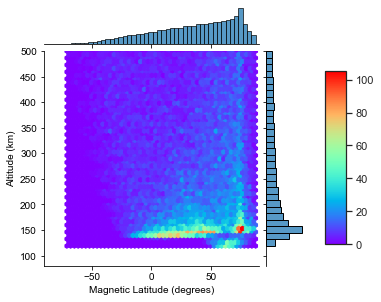

In [1]:
import sys
sys.path.append("../daedalusmase_coverage_calculator/")

# python imports
import ipywidgets as w
import glob
from os import path
# module imports
from data import *
from plot import *


# GUI elements with global scope
style1 = {'description_width':'170px'}
layout1 = {'width':'780px'}
style2 = {'description_width':'80px'}
layout2 = {'width':'140px'}
style3 = {'description_width':'40px'}
layout3 = {'width':'140px'}
OrbitPreviewImage = w.Image( format='png', visible=False )
OrbitPreviewImage.layout.visibility = 'hidden'
ExecutionTitle_Text = w.Text(value="", description='Execution title:', style=style1, layout=layout1)
ExecutionDescr_Text = w.Text(value="", description='Execution description:', style=style1, layout=layout1)
OrbitFilenames_Dropdown = w.Dropdown( options=sorted(glob.glob(Orbit_Files_Path + "*.csv")), description='Orbit files: ', style=style1, layout=layout1)
Years_Dropdown = w.Dropdown( value=2015, options=range(1932,2016),  description='Use Kp indices from year:', style=style1, layout=layout1)
SavedFilenames_Dropdown = w.Dropdown( options=sorted(glob.glob(CoverageResults_Files_Path + "*.*")),  description='', style=style1, layout=layout1)
PlotBars_Checkbox      = w.Checkbox(value=False,  description="Create Bars-Chart for each Magnetic Latitude", style=style1, layout=layout1 )
PlotAltBars_Checkbox   = w.Checkbox(value=True,  description="Create Bars-Chart grouped by region", style=style1, layout=layout1 )
PlotPolar_Checkbox     = w.Checkbox(value=True,  description="Create Polar-Chart for each Altitude region", style=style1, layout=layout1 )
PolarXL_Checkbox       = w.Checkbox(value=True,  description="XL version", style=style1, layout=layout1 )
PlotKpScatter_Checkbox = w.Checkbox(value=False, description="Create Kp-Scatter (Heavy)", style=style1, layout=layout1 )
PlotKpScatter_fromDate = w.Text(value="01-01-2015", description='From', style=style3, layout=layout3)
PlotKpScatter_toDate   = w.Text(value="31-12-2017", description='To', style=style3, layout=layout3)
PlotKpScatter_fromAlt  = w.IntText(value=0, description='From alt.(km)', style=style2, layout=layout2)
PlotKpScatter_toAlt    = w.IntText(value=200, description='To alt.(km)', style=style2, layout=layout2)
PlotAltMaglat_Checkbox = w.Checkbox(value=True,  description="Create Magnetic Latitude - Altitude Chart", style=style1, layout=layout1 )

#################### EVENT LISTENERS ###########################
def Exec_Btn_Clicked( b ):
    print( "Coverage Calculation started." )
    readGeomagneticIndices( Years_Dropdown.value, Years_Dropdown.value+4 )
    BinMisses, BinHits, ResultsFilename, Duration =CalculateCoverage( ExecutionTitle_Text.value, 
                                                                      ExecutionDescr_Text.value, 
                                                                      OrbitFilenames_Dropdown.value, 
                                                                      Years_Dropdown.value )
    if len(ResultsFilename) > 0:
        print( "Coverage Calculation finshed in " + str(Duration) + " seconds, with " + str(BinMisses) + " bin misses, " + str(BinHits) + " bin hits." )
        print( "RESULTS (stored in " + ResultsFilename + "):" )
        for B in Bins:
            B.printMe()
        if PlotBars_Checkbox.value      == True: 
            print("Ploting Bin data on a bar-chart (grouped by Magnetic Latitude)")
            PlotCoverage_Bars( ExecutionTitle_Text.value )
        if PlotAltBars_Checkbox.value      == True: 
            print("Ploting Bin data on a bar-chart (grouped by region)")
            PlotCoverage_Bars_GroupedByRegion( ExecutionTitle_Text.value, [ ["SMP"], ["AEE", "AEM","AED"],  ["AFM","CF","PCF"],  ["EPB", "SQ"],  ["EEJ"] ] )
        if PlotPolar_Checkbox.value     == True: 
            print("Ploting Bin data on a polar-chart")
            PlotCoverage_PolarChart( ExecutionTitle_Text.value , 1.4 )
        if PlotKpScatter_Checkbox.value == True: 
            print("Ploting Bin data on a Kp scatter-chart")
            PlotOrbit_KpScatter(OrbitFilenames_Dropdown.value, int(Years_Dropdown.value), PlotKpScatter_fromDate.value, PlotKpScatter_toDate.value, PlotKpScatter_fromAlt.value, PlotKpScatter_toAlt.value )
        if PlotAltMaglat_Checkbox.value == True:
            print("Ploting Magnetic Latitude - Altitude Chart")
            PlotOrbit_Heatmap( OrbitFilenames_Dropdown.value )
            
def Load_Btn_Clicked( b ):
    global COVERAGE_Title, COVERAGE_Description, COVERAGE_OrbitFilename, COVERAGE_ResultsFilename, COVERAGE_KpStartYear
    if len(SavedFilenames_Dropdown.value) > 0:
        COVERAGE_ResultsFilename = ResultsFilename = SavedFilenames_Dropdown.value
        with open(COVERAGE_ResultsFilename, 'r') as F:
            for line in F:
                if line[0:1] == '#': # this line contains a comment, print it as it is.
                    print ( line[1:len(line)-1] )
                    if line.startswith("# Title:"): COVERAGE_Title = line[8:].strip()
                    if line.startswith("# Description:"): COVERAGE_Description = line[14:].strip()
                    if line.startswith("# Parsed"): COVERAGE_OrbitFilename = line[line.find("orbit file")+11:].strip()
                    if line.startswith("# Used Kp"): COVERAGE_KpStartYear = line[37:].strip()
                else: # this line contains bin info, print it and store them in the correct bin.
                    print ( line[:len(line)-1] )
                    aBinID = line[:line.find(":")].strip()
                    secondsInBin = float( line[line.rfind("min")+3:line.rfind("/")] )
                    for B in Bins:
                        if B.ID == aBinID:
                            B.CumulativeTime = secondsInBin
                            break
        F.close()
        ##
        readGeomagneticIndices( int(COVERAGE_KpStartYear), int(COVERAGE_KpStartYear)+4)
        if PlotBars_Checkbox.value      == True: 
            print("Ploting Bin data on a bar-chart (grouped by Magnetic Latitude)")
            PlotCoverage_Bars( COVERAGE_Title )
        if PlotAltBars_Checkbox.value      == True: 
            print("Ploting Bin data on a bar-chart (grouped by region)")
            PlotCoverage_Bars_GroupedByRegion( COVERAGE_Title, [ ["SMP"], ["AEE", "AEM","AED"],  ["AFM","CF","PCF"],  ["EPB", "SQ"],  ["EEJ"] ] )         
        if PlotPolar_Checkbox.value     == True:
            print("Ploting Bin data on a polar-chart")
            if PolarXL_Checkbox.value == True:
                PlotCoverage_PolarChart( COVERAGE_Title , 1.4 )
            else:
                PlotCoverage_PolarChart( COVERAGE_Title , 1 )
        if PlotKpScatter_Checkbox.value == True: 
            print("Ploting Bin data on a Kp scatter-chart")
            PlotOrbit_KpScatter(COVERAGE_OrbitFilename, int(COVERAGE_KpStartYear), PlotKpScatter_fromDate.value, PlotKpScatter_toDate.value, PlotKpScatter_fromAlt.value, PlotKpScatter_toAlt.value)
        if PlotAltMaglat_Checkbox.value == True:
            print("Ploting Magnetic Latitude - Altitude Chart")
            PlotOrbit_Heatmap( COVERAGE_OrbitFilename)
            
################################################################

def OrbitFilenames_Dropdown_onChange(change):
    if change['type']=='change' and change['name']=='value' and change['new'] is not None and len(change['new'])>0:
        OrbitFilename = change['new']
        display_OrbitRelated_image( OrbitFilename ) 

        
def SavedFilenames_Dropdown_onChange(change):
    if change['type']=='change' and change['name']=='value' and change['new'] is not None and len(change['new'])>0:
        OrbitFilename = ""
        # read results file and find the orbit filename
        with open( change['new'], 'r') as F:
            for line in F:
                if line.startswith("# Parsed"): 
                    OrbitFilename = line[line.find("orbit file")+11:].strip()
                    break
        F.close()
        display_OrbitRelated_image( OrbitFilename ) 

def display_OrbitRelated_image( OrbitFilename ):
        # load image
        ImageFileName = OrbitFilename[:-4] + ".png"
        if not path.exists( ImageFileName ) and "CAMP" in OrbitFilename:
            ImageFileName = "CAMP" + OrbitFilename[OrbitFilename.index("CAMP")+4:OrbitFilename.index("CAMP")+6] + ".png"   
        ####        
        if path.exists( ImageFileName ):
            OrbitPreviewImage.value = open(ImageFileName, "rb").read()
            OrbitPreviewImage.layout.width = "600px"
            OrbitPreviewImage.visible = True
            OrbitPreviewImage.layout.visibility = 'visible'
        else:
            OrbitPreviewImage.visible = False
            OrbitPreviewImage.layout.visibility = 'hidden'


def MainTab_Changed( change ):
    if change['type']=='change' and change['name']=='selected_index':
        if change['new'] == 0:
            change = {'type':'change', 'name':'value', 'new':OrbitFilenames_Dropdown.value}
        else:
            change = {'type':'change', 'name':'value', 'new':SavedFilenames_Dropdown.value}
        OrbitFilenames_Dropdown_onChange( change )  

        
#### bunndle GUI elements together        
def createGUI():
    ## the top level visual elements
    MainPanel = w.VBox()    
    MainTab = w.Tab() 
    CalcCoveragePanel = w.VBox()
    LoadCoveragePanel = w.VBox()
    ## the checkboxes which allow user to select which plots he wants to create
    PlotSelectionPanel = w.VBox()
    PlotSelectionPanel.children = [PlotBars_Checkbox, PlotAltBars_Checkbox, w.HBox([PlotPolar_Checkbox, PolarXL_Checkbox]), w.HBox([PlotKpScatter_Checkbox,PlotKpScatter_fromDate,PlotKpScatter_toDate,PlotKpScatter_fromAlt,PlotKpScatter_toAlt]), PlotAltMaglat_Checkbox]
    ##
    MainTab.children = [ CalcCoveragePanel,    LoadCoveragePanel ]
    MainTab.set_title(0, 'Calculate Coverage')
    MainTab.set_title(1, 'Load Coverage')
    MainPanel.children = [ MainTab, OrbitPreviewImage ]    
    ## 
    Exec_Btn = w.Button (description='Calculate Coverage',tooltip="Click here to calculate the Daedalus coverage results",)
    Exec_Btn.style.button_color = 'MediumTurquoise'
    Exec_Btn.on_click( Exec_Btn_Clicked )
    CalcCoveragePanel.children = [OrbitFilenames_Dropdown, ExecutionTitle_Text, ExecutionDescr_Text, Years_Dropdown, PlotSelectionPanel, Exec_Btn ]
    ##
    Load_Btn = w.Button (description='Load Coverage from',tooltip="Click here to plot the Daedalus coverage results",)
    Load_Btn.style.button_color = 'YellowGreen'
    Load_Btn.on_click( Load_Btn_Clicked )
    L2_horizontal = w.HBox()
    L2_horizontal.children = [Load_Btn, SavedFilenames_Dropdown]
    LoadCoveragePanel.children = [ w.HBox([Load_Btn, SavedFilenames_Dropdown]), PlotSelectionPanel ]
    ## Assign event listeners
    OrbitFilenames_Dropdown.observe( OrbitFilenames_Dropdown_onChange )
    SavedFilenames_Dropdown.observe( SavedFilenames_Dropdown_onChange )
    MainTab.observe( MainTab_Changed )
    ## display orbit-related image
    change = {'type':'change', 'name':'value', 'new':OrbitFilenames_Dropdown.value}
    OrbitFilenames_Dropdown_onChange( change )        
    return MainPanel


display( createGUI() )

